## Introducción al Machine Learning 
### Ejemplos con árboles de decisión

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bankruptcy = pd.read_csv('../data/bankruptcy.csv', index_col='Company')

Dataset para determinar si una empresa va quebrar o no el próximo año
en función de algunos ratios financieros. El modelo original está inspirado 
en el z-score de Altman. Ver más detalles en:
https://en.wikipedia.org/wiki/Altman_Z-score


In [3]:
bankruptcy.head()

,WC/TA,RE/TA,EBIT/TA,S/TA,BVE/BVL,Bankrupt
Company,,,,,,
360Networks,9.3,-7.7,1.6,9.1,3.726,yes
Advanced Radio Telecom,42.6,-60.1,-10.1,0.3,4.130,yes
Ardent Communications,-28.8,-203.2,-51.0,14.7,0.111,yes
At Home Corp.,2.5,-433.1,-6.0,29.3,1.949,yes
Convergent Communications,26.1,-57.4,-23.5,54.2,0.855,yes


In [4]:
features = bankruptcy.loc[:, bankruptcy.columns != 'Bankrupt']
target = bankruptcy.Bankrupt

### Entrenamiento del árbol

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [6]:
dTree = DecisionTreeClassifier()
_ = dTree.fit(features.values, target.values)

Representación en árbol binario (**True** rama izquierda, **False** rama derecha)

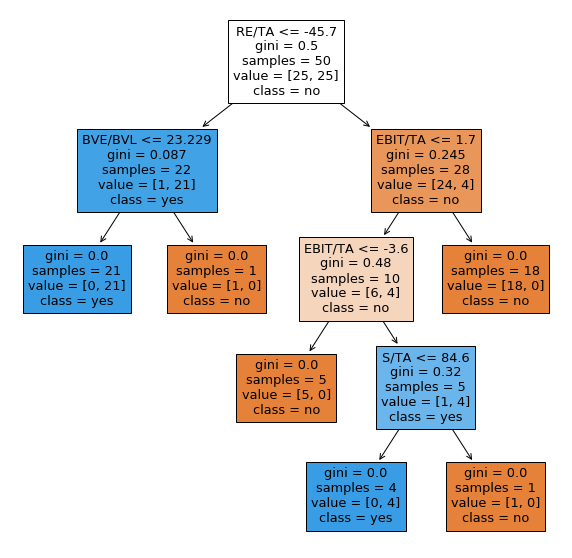

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
_ = plot_tree(dTree, feature_names=features.columns,
                            class_names=dTree.classes_,
                            filled=True)

Predicción de nuevas instancias

In [8]:
new_cia = pd.Series({'WC/TA': -2.7, 
           'RE/TA': 2.8, 
           'EBIT/TA': 3.6, 
           'S/TA': 20.3, 
           'BVE/BVL': 0.32})
new_cia

WC/TA      -2.70
RE/TA       2.80
EBIT/TA     3.60
S/TA       20.30
BVE/BVL     0.32
dtype: float64

In [9]:
new_x = new_cia.values.reshape(1,-1)
dTree.predict(new_x)

array(['no'], dtype=object)

Predicción probabilística

In [10]:
print(dTree.classes_)
dTree.predict_proba(new_x)

['no' 'yes']


array([[1., 0.]])

#### Propuesta Ejercicio
Entrenar el mismo árbol de decisión cambiando los parámetros 
    - min_samples_leaf
    - max_depth
y visualizar las diferencias del árbol y de su predicción para la nueva empresa